# Refrigeration Plant Load Time Series from Widell and Eikevik

In [1]:
import os
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt

In [2]:
data_dir = "data"
[name for name in os.listdir(data_dir) if name.endswith('csv')]

['adjusted_input_signal.csv',
 'load-target-seq-period-2-resampled-250.csv',
 'load-target-seq-period-1-resampled-250.csv',
 'autkometris_dection_period1_avg_5px_230326.csv',
 'autometris_detection_period1_5min_230326.csv',
 'autkometris_dection_period2_avg_3px_230326.csv']

In [3]:
filename = "autometris_detection_period1_5min_230326.csv"
df = pd.read_csv(os.path.join(data_dir, filename), header=None)
df.columns = ["Time (min)", "Load Target (%)"]
df = df.set_index("Time (min)")
df.shape

(8536, 1)

In [4]:
df.head()

,Load Target (%)
Time (min),
5.0,16.161268
10.0,16.161268
15.0,16.161268
20.0,16.161268
25.0,16.161268


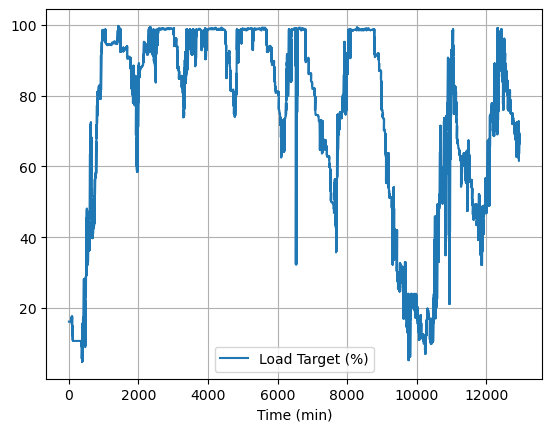

In [5]:
ax = df.plot(grid=True)

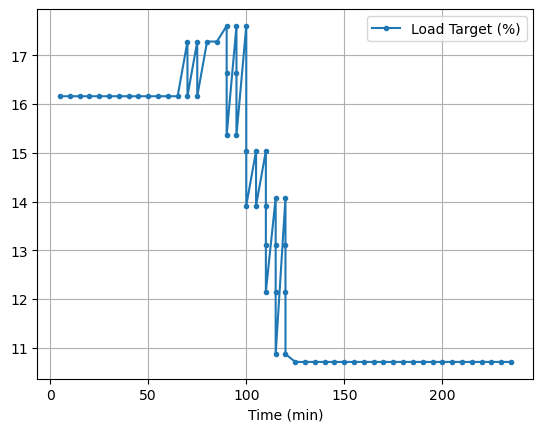

In [6]:
ax = df.loc[df.index < 240].plot(marker='.', grid=True)

## Load data generated with pixel averaging for 1st period

In [7]:
filename = "autkometris_dection_period1_avg_5px_230326.csv"
df = pd.read_csv(os.path.join(data_dir, filename), header=None)
df.columns = ["Time (min)", "Load Target (%)"]
df = df.set_index("Time (min)")
df.shape

(765, 1)

In [8]:
df.head(10)

,Load Target (%)
Time (min),
33.948562,16.361656
86.247907,16.681423
110.188973,13.955777
142.311352,11.016252
208.225609,10.908306
274.170783,10.907233
340.054123,10.692414
391.499396,8.059834
382.572219,5.695419


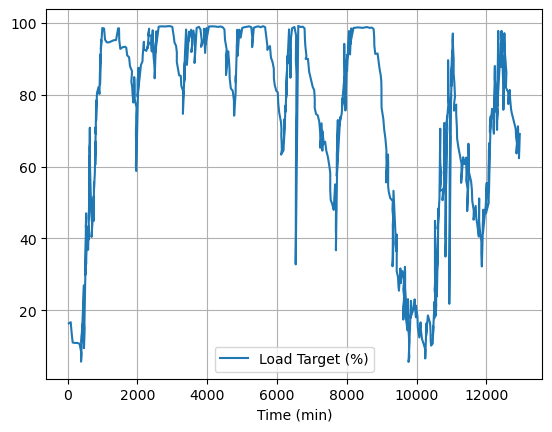

In [9]:
ax = df.plot(grid=True)

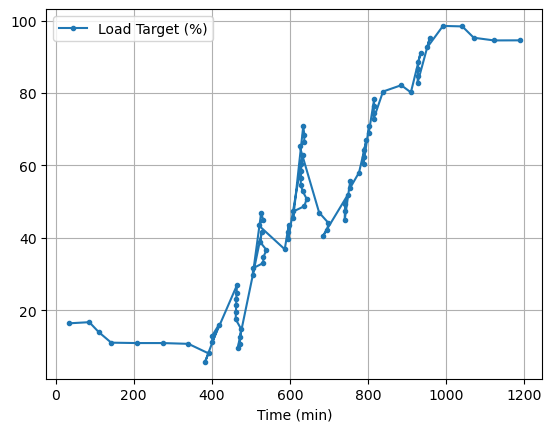

In [10]:
df.loc[df.index < 1200].plot(marker='.')
plt.grid()

In [11]:
# Sort and resample
df = df.sort_values(by="Time (min)")
df.head()

,Load Target (%)
Time (min),
33.948562,16.361656
86.247907,16.681423
110.188973,13.955777
142.311352,11.016252
208.225609,10.908306


In [12]:
np.sum(np.diff(df.index) == 0)

0

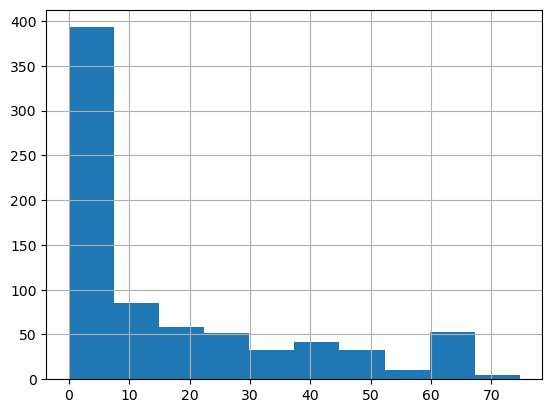

In [13]:
plt.hist(np.diff(df.index))
plt.grid()

In [14]:
t0 = df.index[0]
t0

33.94856155405225

In [15]:
# Function to interpolate new values
intf = interp1d(df.index - t0, df["Load Target (%)"], kind='nearest')

In [16]:
# Last point
df.index[-1] - t0

12924.071433217023

In [17]:
# Step size in seconds
dt = 250
n_steps = int(np.floor((df.index[-1] - t0) * 60 / dt)) - 1
n_steps

3100

In [18]:
new_index_values = dt * np.arange(0, n_steps + 1)
df_rs = pd.DataFrame(
    intf(new_index_values / 60),
    index=pd.Index(new_index_values),
    columns=df.columns
)
df_rs

,Load Target (%)
0,16.361656
250,16.361656
500,16.361656
750,16.361656
1000,16.361656
...,...
774000,62.320713
774250,66.595605
774500,66.595605
774750,66.595605


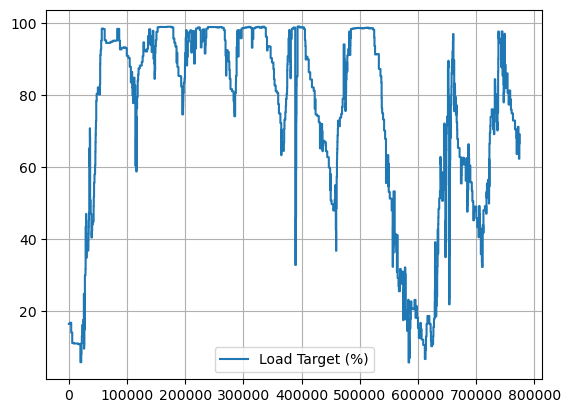

In [19]:
ax = df_rs.plot(drawstyle="steps-post", grid=True)

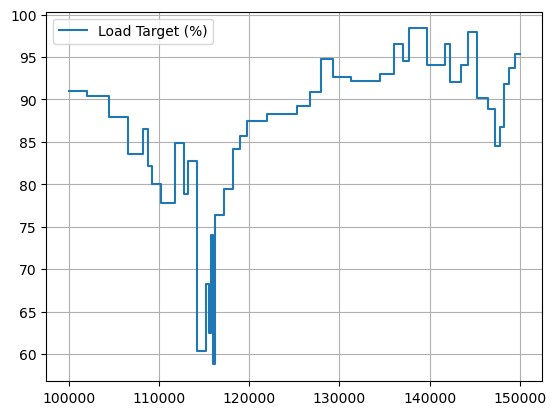

In [20]:
ax = df_rs.loc[100000:150000].plot(drawstyle="steps-post", grid=True)

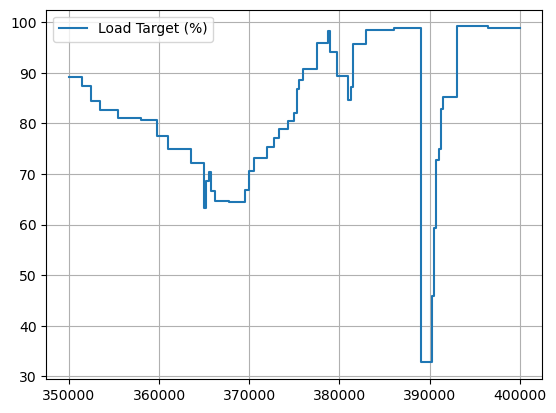

In [21]:
ax = df_rs.loc[350000:400000].plot(drawstyle="steps-post", grid=True)

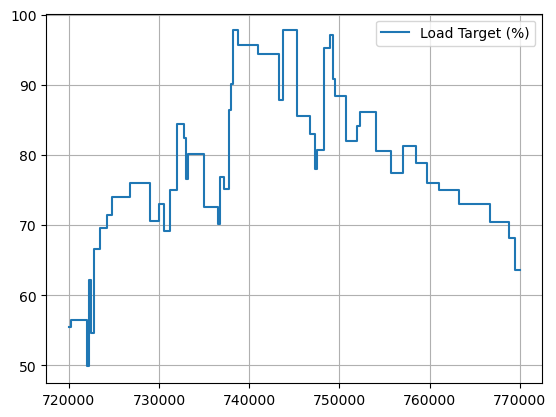

In [22]:
ax = df_rs.loc[720000:770000].plot(drawstyle="steps-post", grid=True)

In [23]:
filename = "load-target-seq-period-1-resampled-250.csv"
df_rs.to_csv(os.path.join(data_dir, filename))

## Load data for second period

In [24]:
filename = "autkometris_dection_period2_avg_3px_230326.csv"
df = pd.read_csv(os.path.join(data_dir, filename), header=None)
df.columns = ["Time (min)", "Load Target (%)"]
df = df.set_index("Time (min)")
df.shape

(906, 1)

In [25]:
df.head(10)

,Load Target (%)
Time (min),
11.615261,11.682467
55.505912,11.722612
99.396563,11.722612
139.995416,12.332812
143.287215,18.065477
137.800883,16.700557
143.287215,15.255347
143.287215,13.970716
152.431100,10.919718


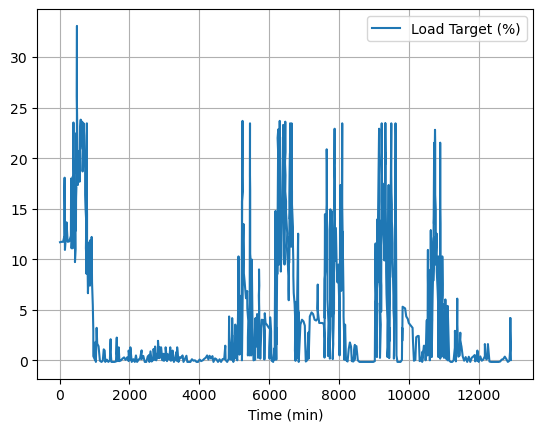

In [26]:
ax = df.plot(grid=True)

In [27]:
# Sort and resample
df = df.sort_values(by="Time (min)")
df.head()

,Load Target (%)
Time (min),
11.615261,11.682467
55.505912,11.722612
99.396563,11.722612
137.800883,16.700557
139.995416,12.332812


In [28]:
duplicates = df.index.duplicated()
np.sum(duplicates)

276

In [29]:
df.loc[duplicates].head()

,Load Target (%)
Time (min),
143.287215,15.255347
143.287215,13.970716
329.822483,16.700557
329.822483,15.415926
329.822483,14.131295


In [30]:
# Replace duplicates with the median values
df_rs = df.groupby("Time (min)").median()
df_rs.head()

,Load Target (%)
Time (min),
11.615261,11.682467
55.505912,11.722612
99.396563,11.722612
137.800883,16.700557
139.995416,12.332812


In [31]:
d = np.unique(df.loc[duplicates].index)
d[:5]

array([143.28721474, 329.82248288, 373.71313421, 412.11745412,
       423.09011695])

In [32]:
df_rs.loc[d[0]]

Load Target (%)    15.255347
Name: 143.2872147447262, dtype: float64

In [33]:
t0 = df_rs.index[0]
t0

11.61526076539581

In [34]:
# Function to interpolate new values
intf = interp1d(df_rs.index - t0, df_rs["Load Target (%)"], kind='nearest')

In [35]:
# Last point
df_rs.index[-1] - t0

12903.851489974373

In [36]:
# Step size in seconds
dt = 250
n_steps = int(np.floor((df_rs.index[-1] - t0) * 60 / dt)) - 1
n_steps

3095

In [37]:
new_index_values = dt * np.arange(0, n_steps + 1)
df_rs = pd.DataFrame(
    intf(new_index_values / 60),
    index=pd.Index(new_index_values),
    columns=df_rs.columns
)
df_rs

,Load Target (%)
0,11.682467
250,11.682467
500,11.682467
750,11.682467
1000,11.682467
...,...
772750,2.890774
773000,2.890774
773250,2.890774
773500,2.890774


(0.0, 100.0)

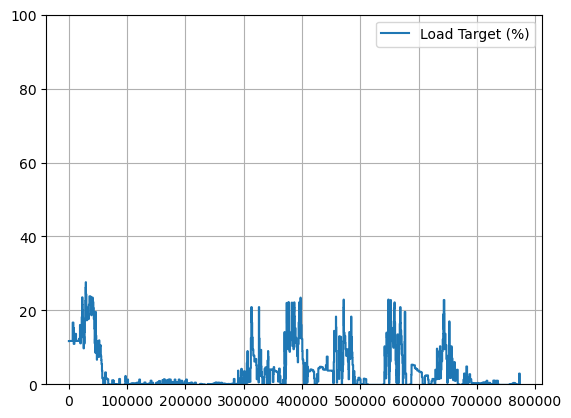

In [38]:
ax = df_rs.plot(drawstyle="steps-post", grid=True)
plt.ylim([0, 100])

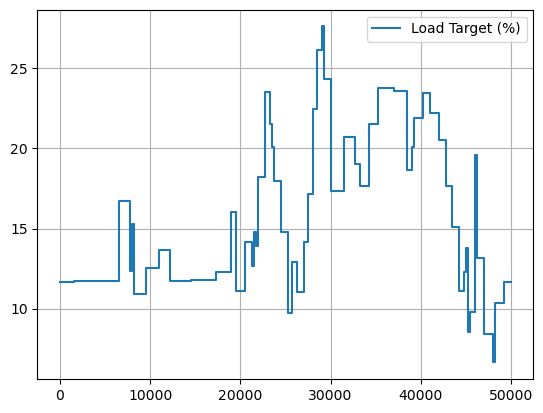

In [39]:
ax = df_rs.loc[:50000].plot(drawstyle="steps-post", grid=True)

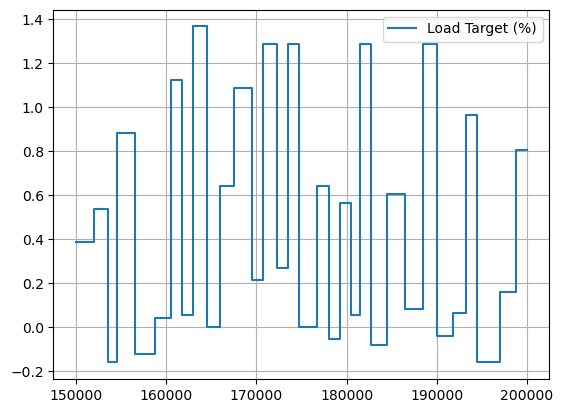

In [40]:
ax = df_rs.loc[150000:200000].plot(drawstyle="steps-post", grid=True)

In [41]:
# Need to re-size so it is not below zero
df_rs = (df_rs - df_rs.min())
df_rs.describe()

,Load Target (%)
count,3096.000000
mean,3.825798
std,5.595453
min,0.000000
25%,0.160579
50%,1.043763
75%,4.817366
max,27.780144


In [42]:
filename = "load-target-seq-period-2-resampled-250.csv"
df_rs.to_csv(os.path.join(data_dir, filename))